In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
alpha = 1e-3
tottime = 10 
L = 1
N = 100              
dx = L/N 
dy = dx
h = dy
dt = 1e-2
nt = int(tottime/dt)
x = np.linspace(0,L,N+1)
y = np.linspace(0,L,N+1)
X, Y = np.meshgrid(x, y)
v_x = 0.08 * X
v_y = 0.08 * Y

In [92]:
stab_diff = alpha * dt / dx**2
stab_adv_x = np.max(0.05 * x) * dt / dx
stab_adv_y = np.max(0.05 * y) * dt / dy

print(f"Diffusion Stability Parameter: {stab_diff:.4f} (must be ≤ 0.25)")
print(f"Advection Stability Parameter in x: {stab_adv_x:.4f} (must be ≤ 1)")
print(f"Advection Stability Parameter in y: {stab_adv_y:.4f} (must be ≤ 1)")

assert stab_diff <= 0.25, "Diffusion stability condition violated!"
assert stab_adv_x <= 1 and stab_adv_y <= 1, "Advection stability condition violated!"


Diffusion Stability Parameter: 0.1000 (must be ≤ 0.25)
Advection Stability Parameter in x: 0.0500 (must be ≤ 1)
Advection Stability Parameter in y: 0.0500 (must be ≤ 1)


In [93]:
sigma = 0.03
T = np.exp(-((X - 0.5)**2 + (Y - 0.5)**2) / (2*sigma**2)) 
T_new = np.zeros_like(T)

In [94]:
T_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

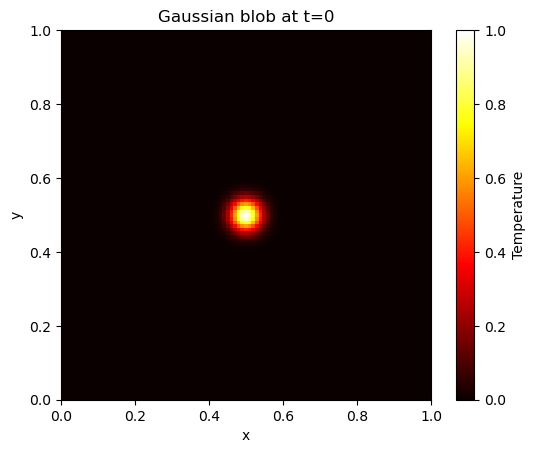

In [95]:
plt.imshow(T, extent=[0, 1, 0, 1], origin='lower', cmap='hot')
plt.colorbar(label='Temperature')
plt.title("Gaussian blob at t=0")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [96]:
all_values = np.zeros((nt+1, N+1, N+1))
all_values[0] = T 

In [97]:
for n in range(1, nt+1):
    for i in range(1, N):
        for j in range(1, N):
            T_new[i, j] = (
                T[i, j] 
                + alpha * dt / h**2 * (T[i+1, j] - 2*T[i, j] + T[i-1, j]) 
                + alpha * dt / h**2 * (T[i, j+1] - 2*T[i, j] + T[i, j-1])
                - v_x[i, j] * (dt / h) * (T[i+1, j] - T[i-1, j]) 
                - v_y[i, j] * (dt / h) * (T[i, j+1] - T[i, j-1])
                - 0.1 * dt * T[i, j]
            )
    T_new[0, :] = T_new[1,:]
    T_new[-1, :] = T_new[-2,:]
    T_new[:, 0] = T_new[:, 1]
    T_new[:, -1] = T_new[:, -2]
    T[:,:] = T_new[:,:]
    all_values[n] = T 


In [98]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
cax = ax.imshow(all_values[0], extent=[0, L, 0, L], origin='lower', cmap='hot', vmin=0, vmax=0.2)
fig.colorbar(cax, label='Temperature')
ax.set_title('2D Heat Diffusion')
ax.set_xlabel('x')
ax.set_ylabel('y')

def animate(frame):
    cax.set_array(all_values[frame])
    ax.set_title(f'2D Heat Diffusion at t = {frame*dt:.2f} s')
    return [cax]

interval_steps = 10
ani = FuncAnimation(fig, animate, frames=range(0, nt+1, interval_steps),interval=100, blit=True, repeat=False)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())